In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import seaborn as sns
import matplotlib.pyplot as plt

pd.pandas.set_option('display.max_columns', None)

In [12]:
df = pd.read_csv('./input/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [13]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [14]:
df.shape

(1470, 35)

We can drop these column, as they are just some indicators
* EmployeeCount
* EmployeeNumber
* StandardHours

In [15]:
df.drop(columns=['EmployeeCount', 'EmployeeNumber', 'StandardHours'], axis=1, inplace=True)

**Attrition** is the `target` column

Obtain a count plot of the column

In [16]:
target = 'Attrition'

<AxesSubplot: xlabel='Attrition', ylabel='count'>

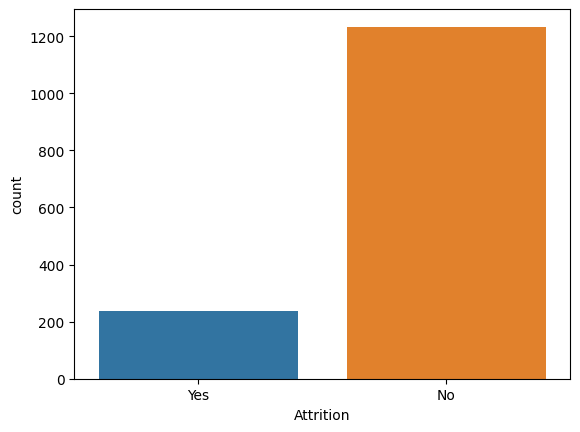

In [17]:
sns.countplot(x=target, data=df)

From the countplot it can be observed that the target is imbalanced.

Later in this notebook, we will alter it.

Now check if any features contains null values

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [19]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

So from the above series it can be concluded that there are no missing values

### Now it's time to do some data vizs
We will start with category variables

In [20]:
# Categorical Variables

cat_vars = [var for var in df.columns if df[var].dtype == 'O' and var != target]

# There are few other categorical features which are not by default
# We will analyze those variables also
xtra_vars = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel' ,'JobSatisfaction',
             'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'NumCompaniesWorked',
             'StockOptionLevel', 'PercentSalaryHike', 'TrainingTimesLastYear']


cat_vars = cat_vars + xtra_vars

In [21]:
cat_vars

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'WorkLifeBalance',
 'NumCompaniesWorked',
 'StockOptionLevel',
 'PercentSalaryHike',
 'TrainingTimesLastYear']

In [22]:
def plot_cat(var, dataframe):
    plt.figure(figsize=(16, 4))
    sns.countplot(x=var, hue=target, data=dataframe)
    plt.show()

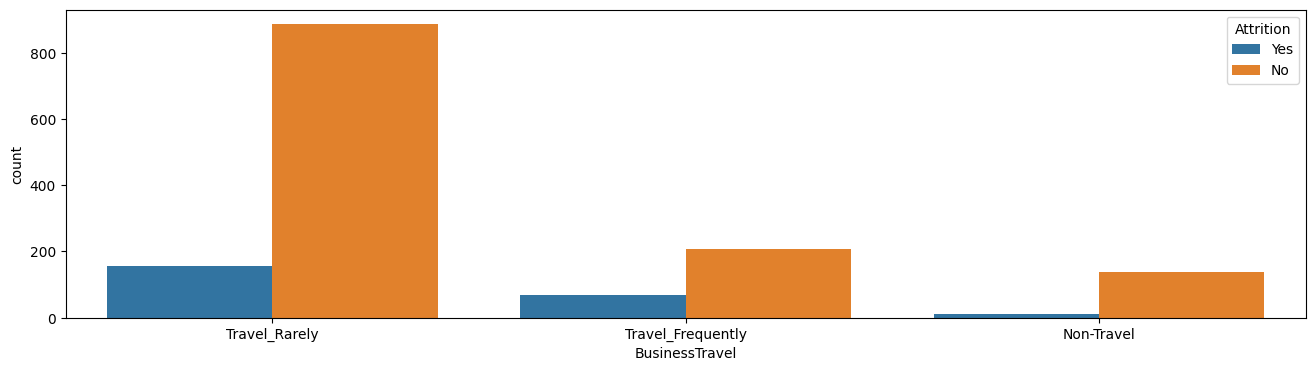

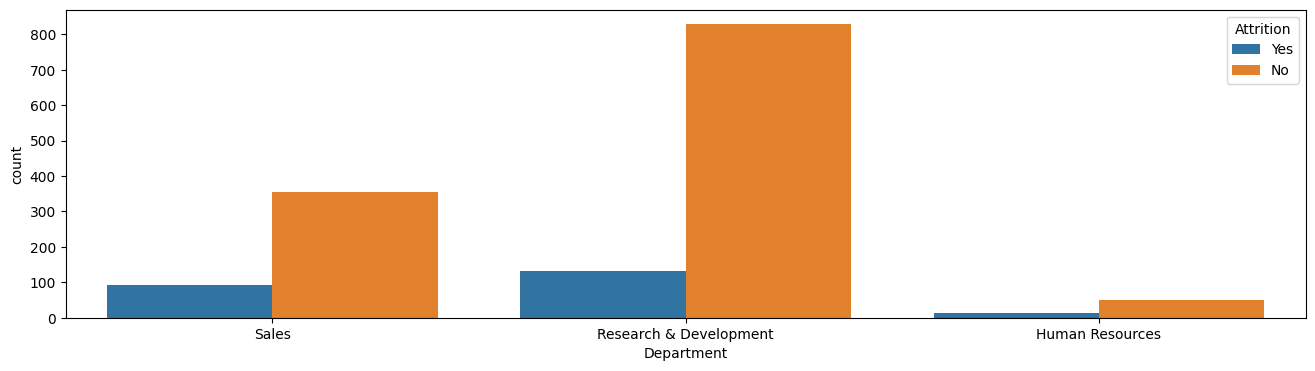

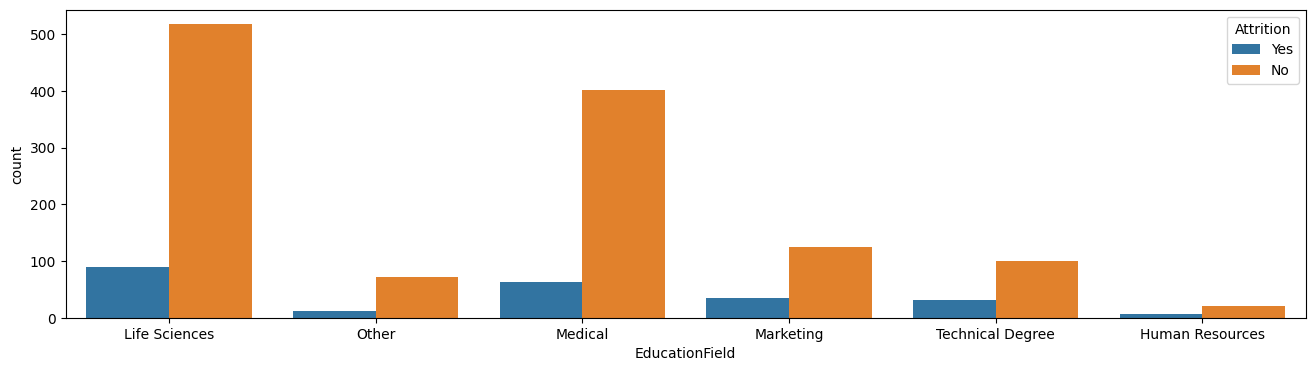

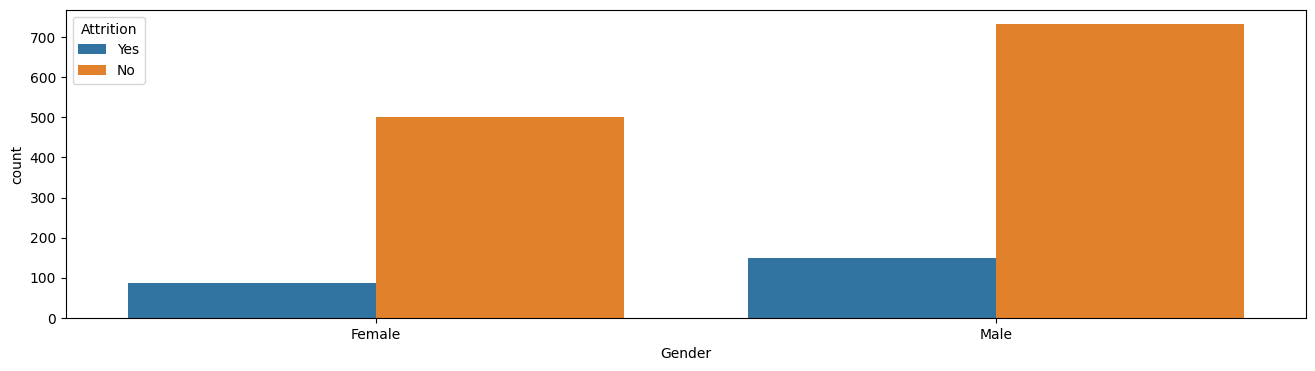

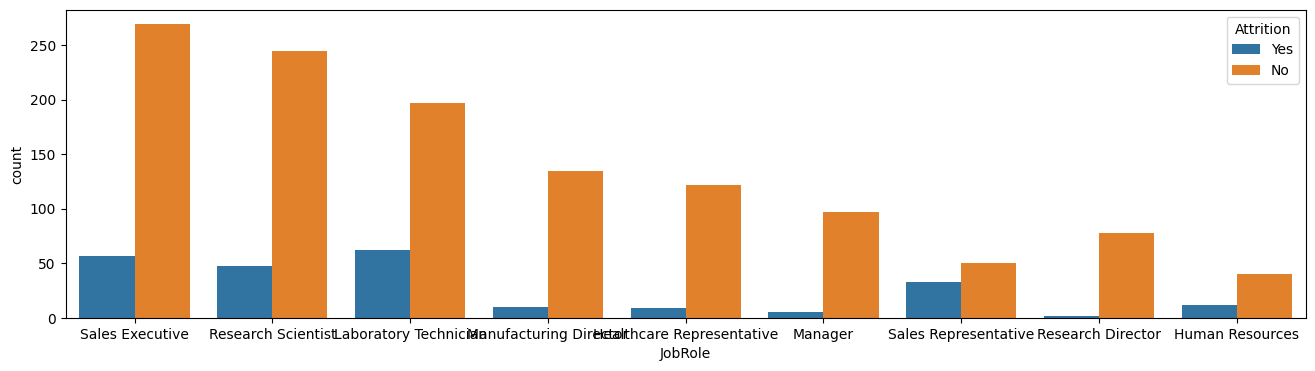

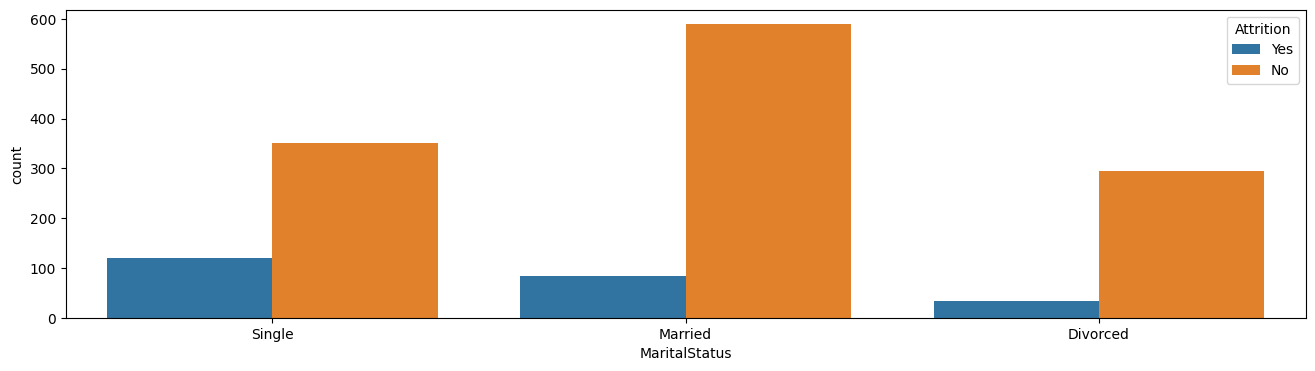

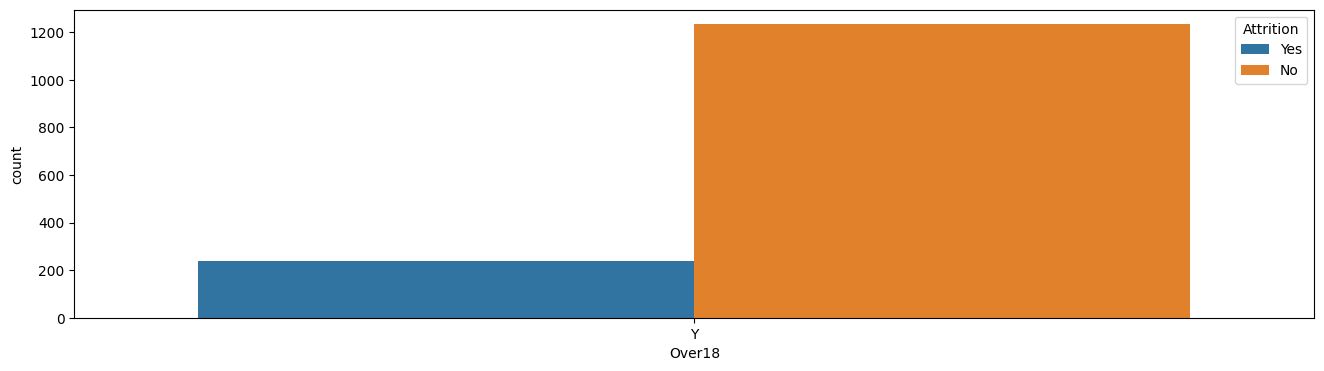

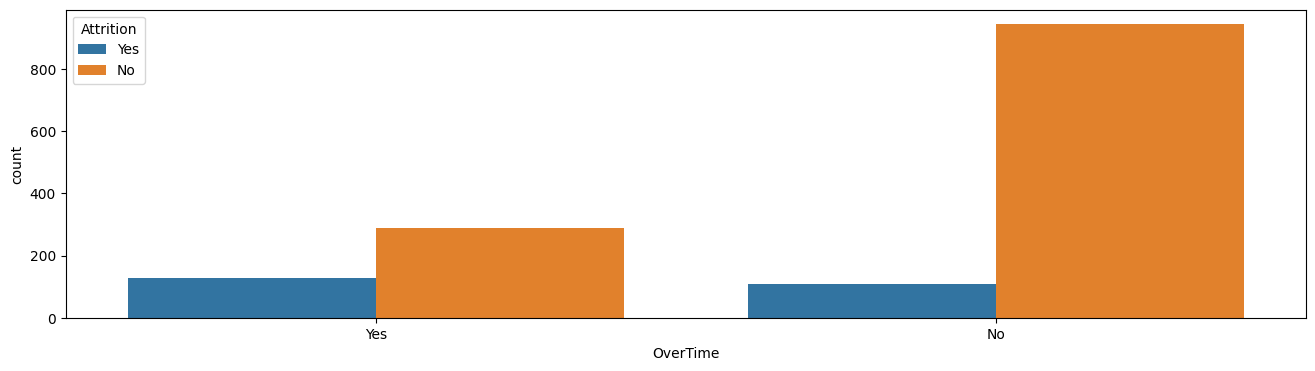

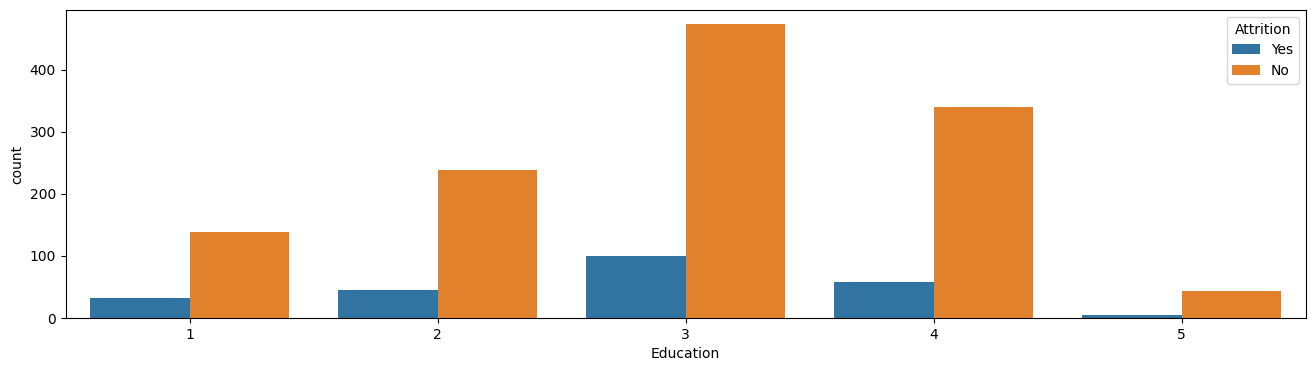

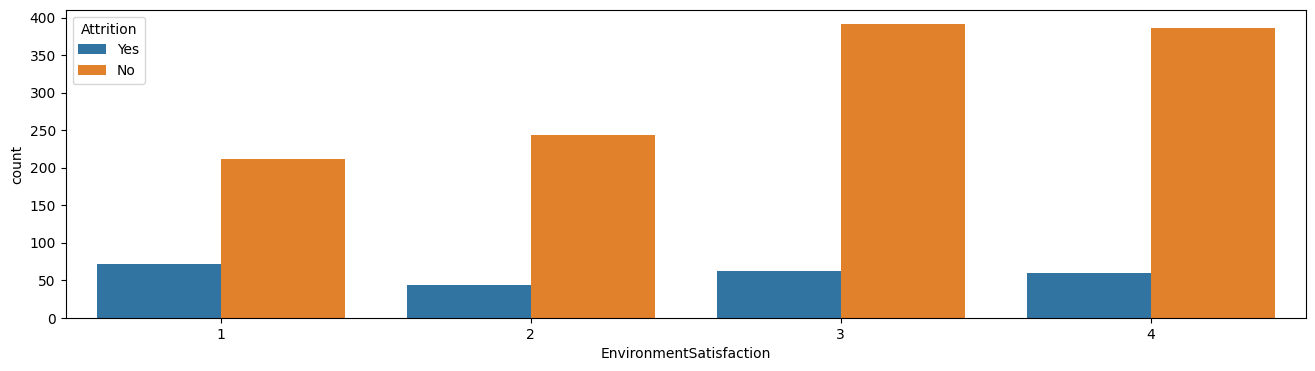

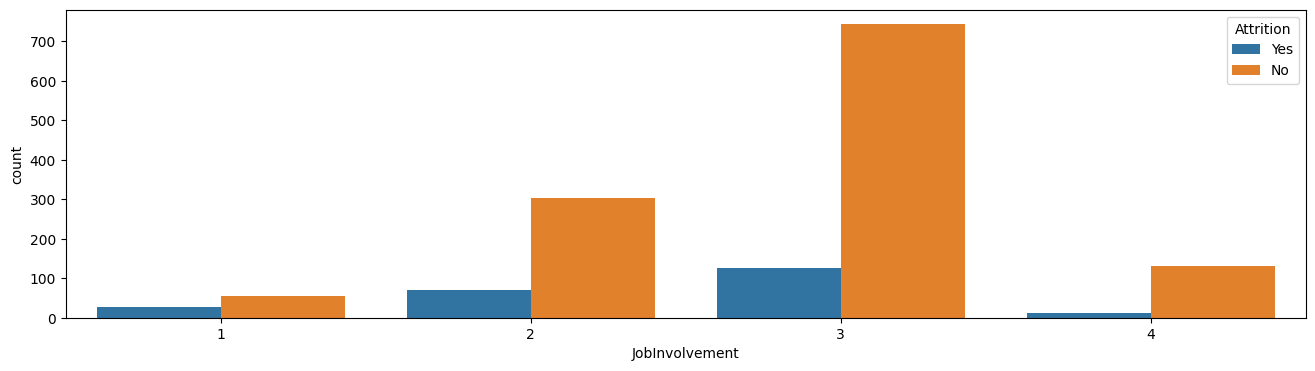

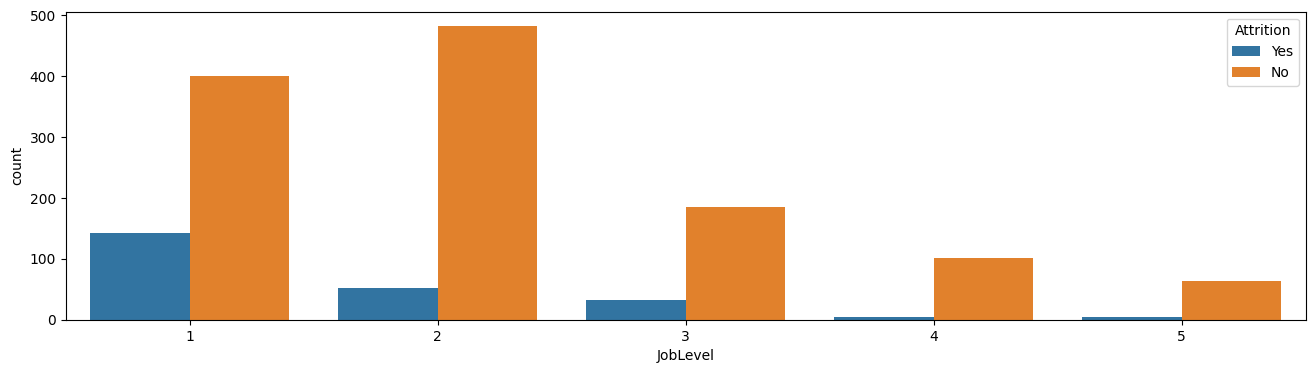

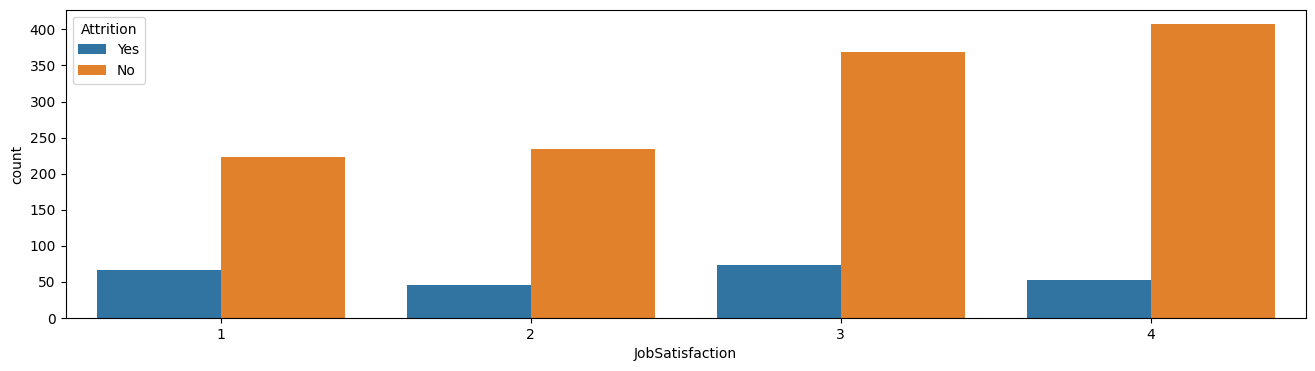

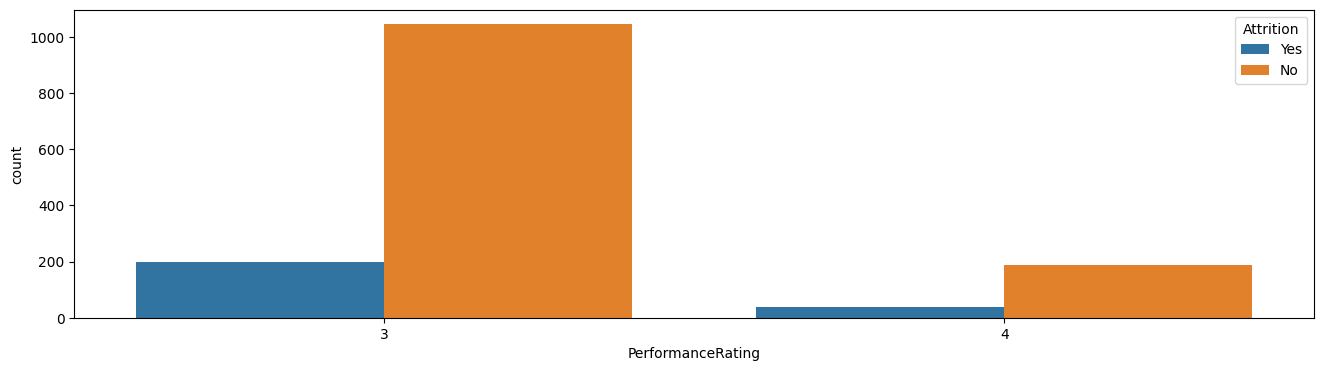

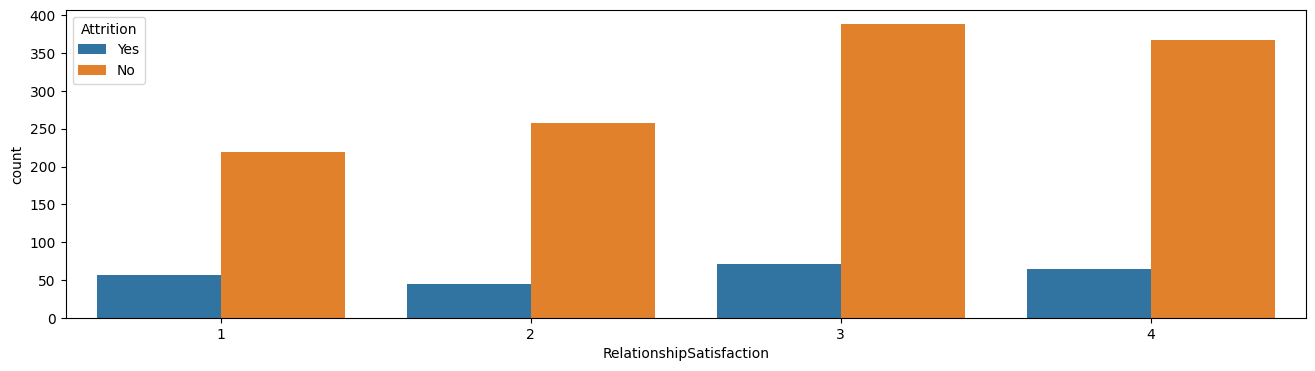

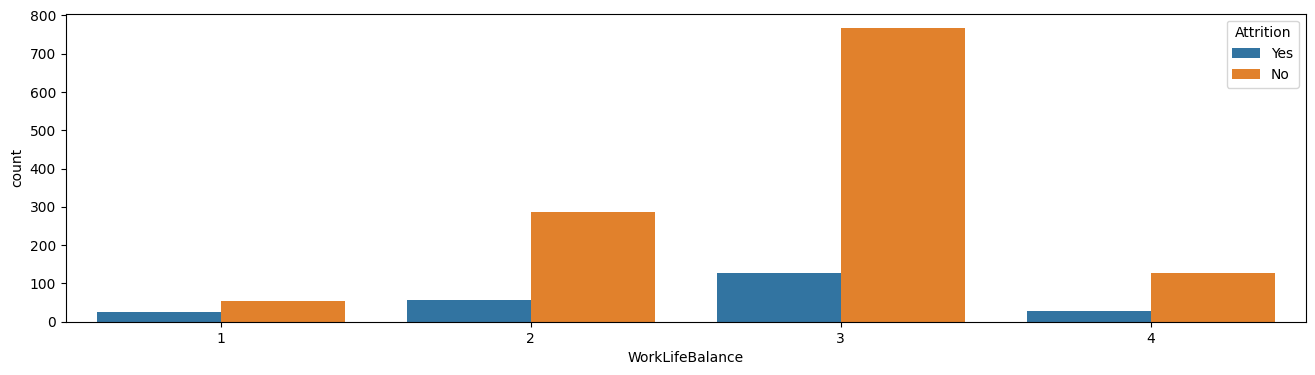

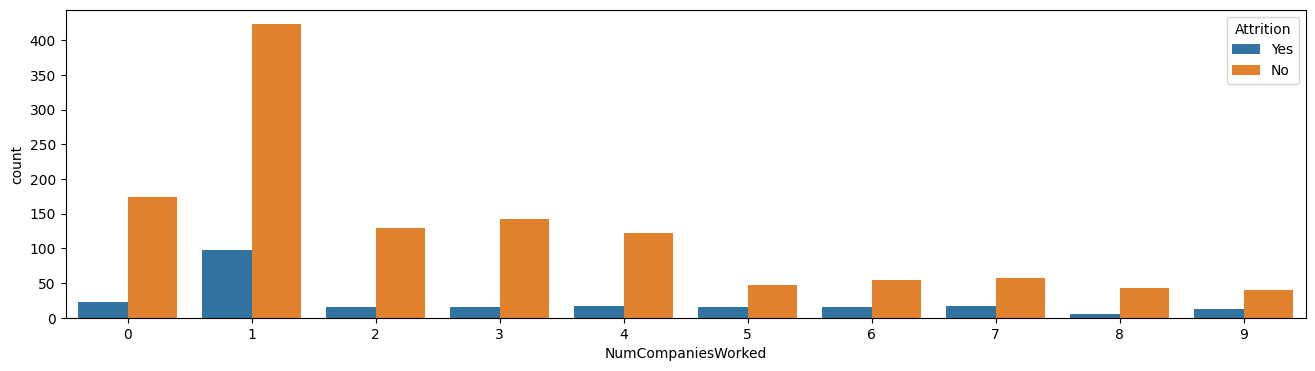

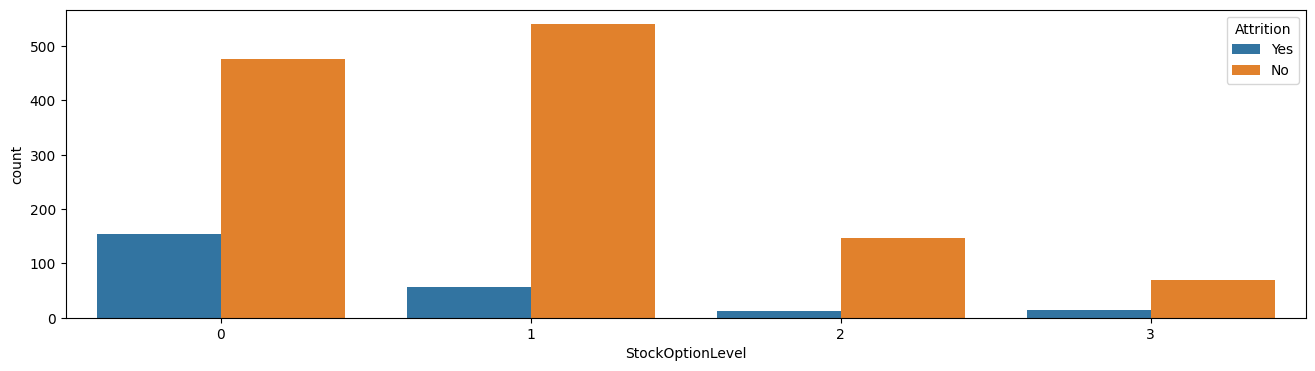

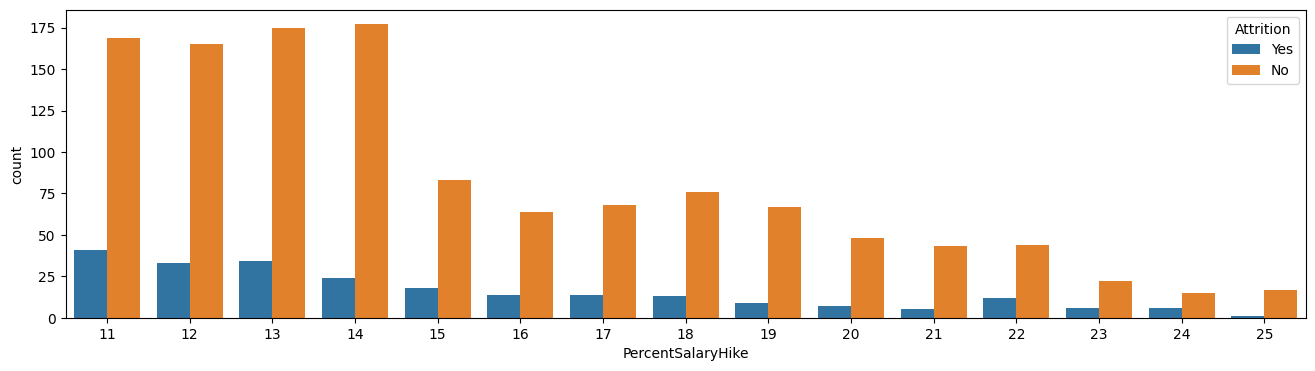

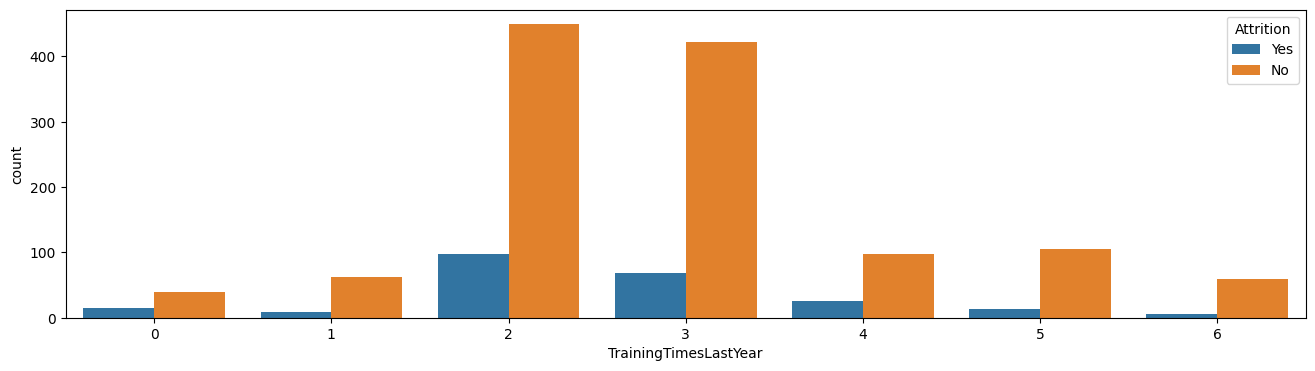

In [23]:
for i in cat_vars:
    plot_cat(i, df)

## Let's plot a percentage plot to check what percent of employees
## left at each features

In [24]:
def plot_cat_percent(var, dataframe):
    plt.figure(figsize=(16, 4))
    ys_df = df[df[target] == 'Yes'].groupby(var).count()[target]
    no_df = df[df[target] == 'No'].groupby(var).count()[target]
    rat = ys_df / (ys_df + no_df) * 100
    rat.plot(kind='bar')
    plt.show()

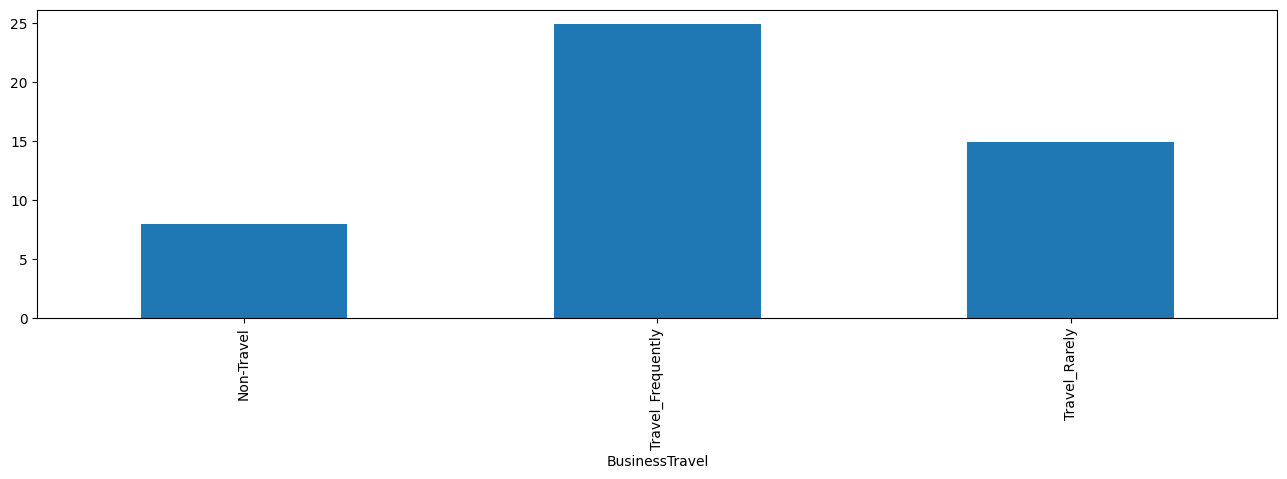

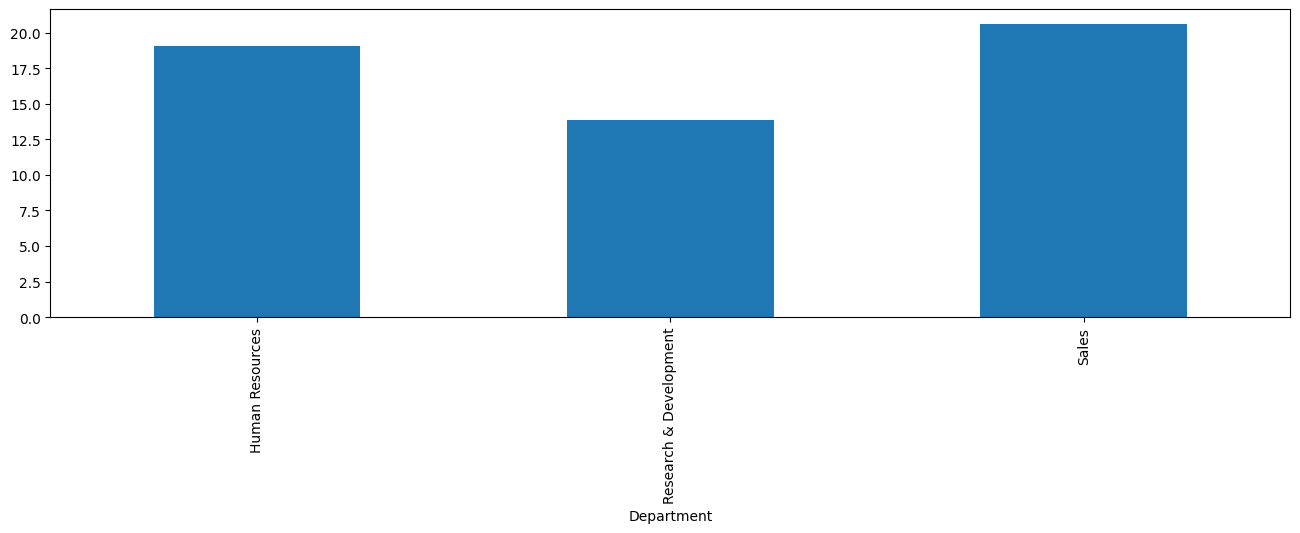

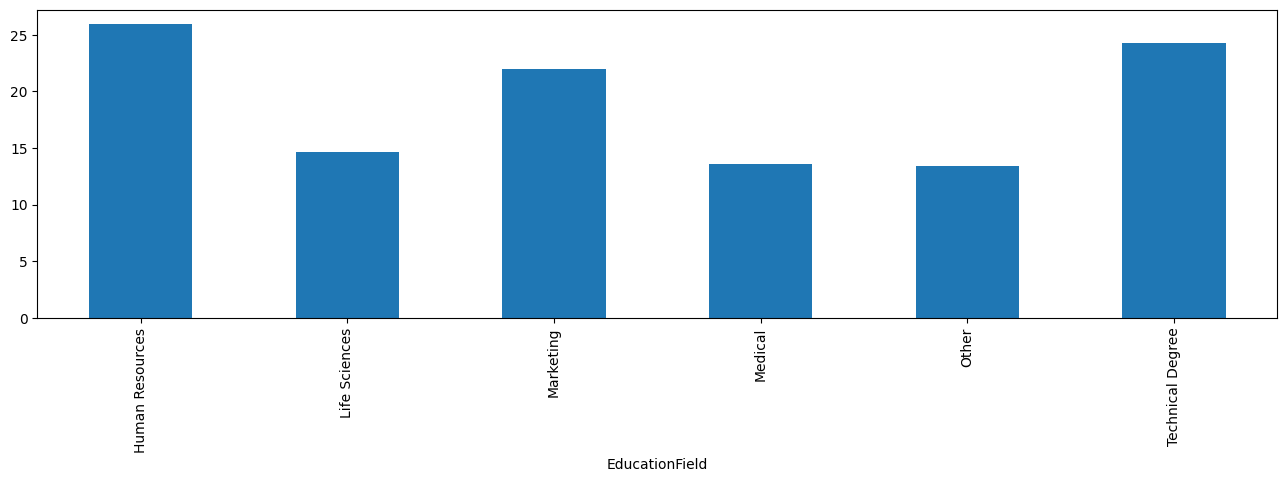

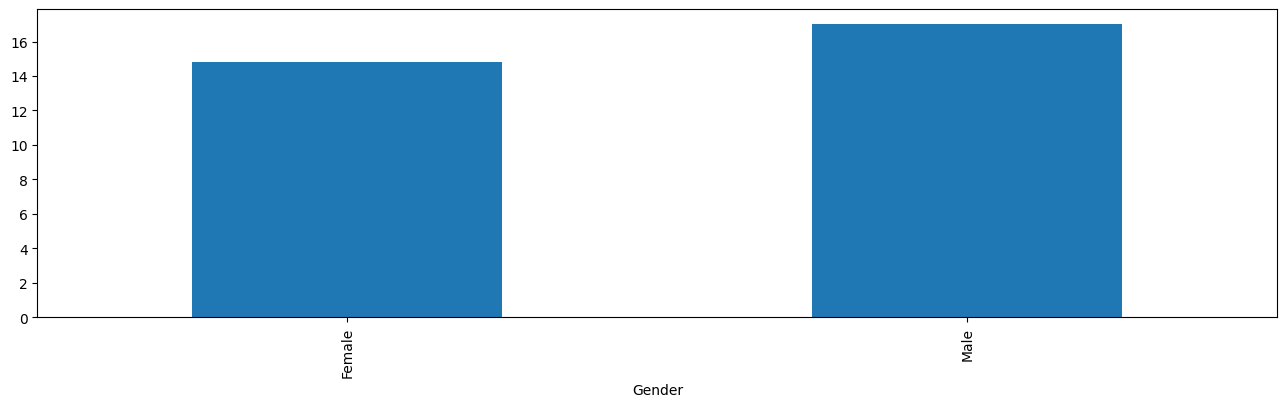

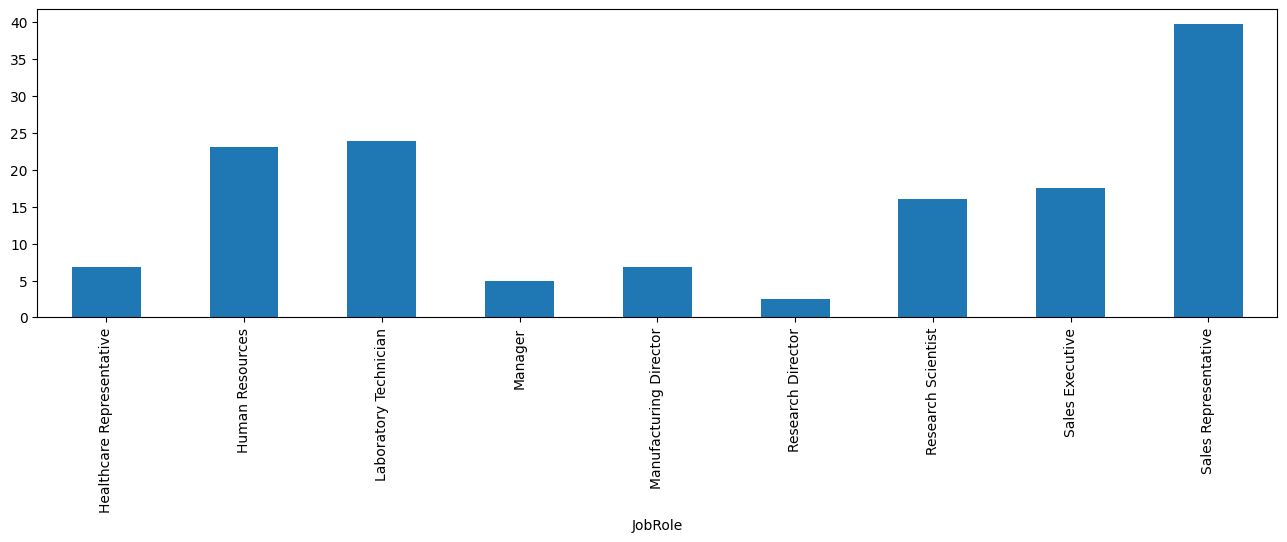

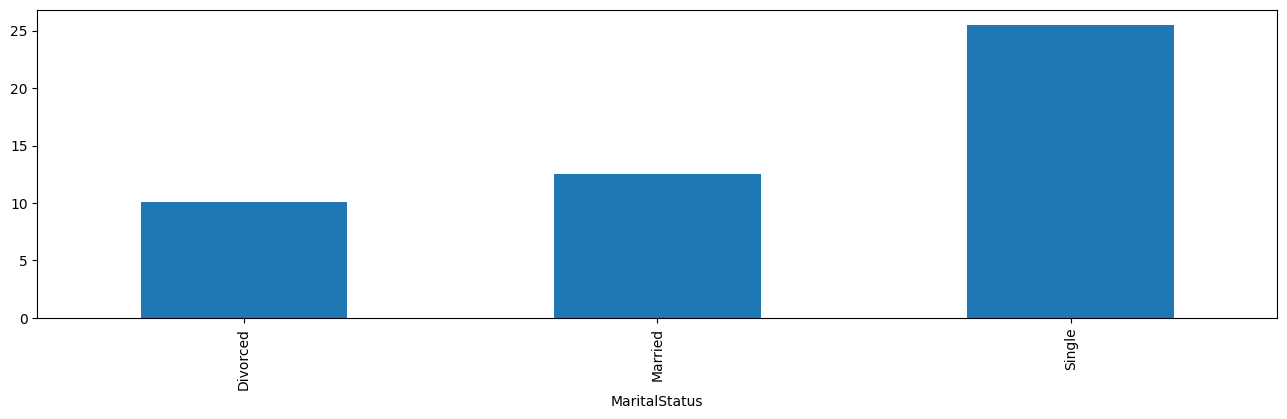

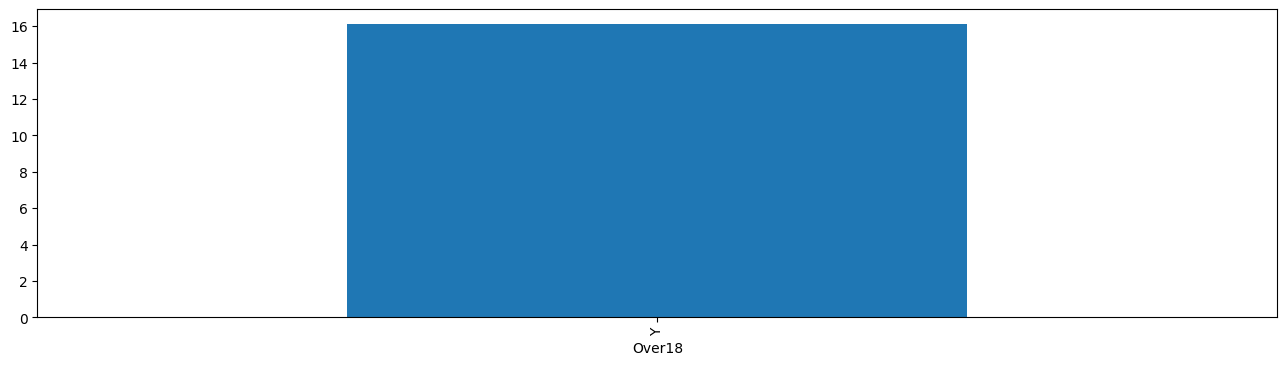

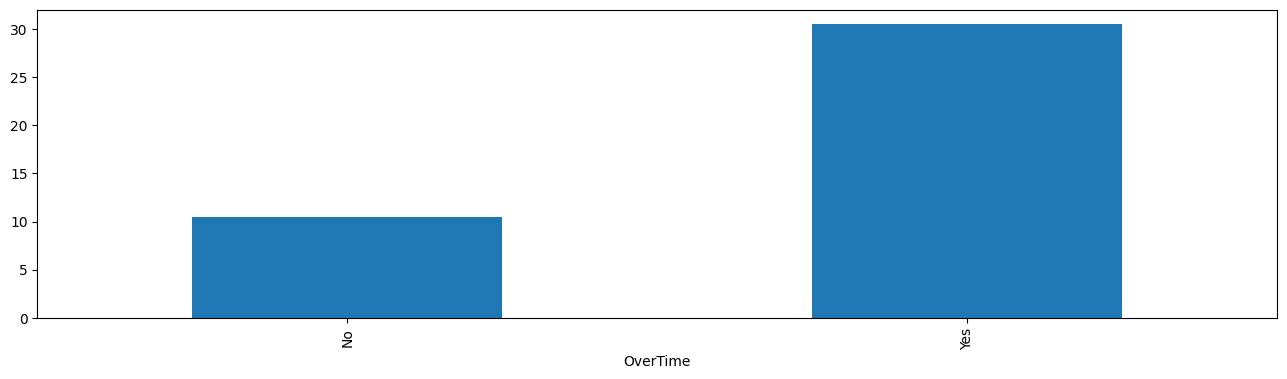

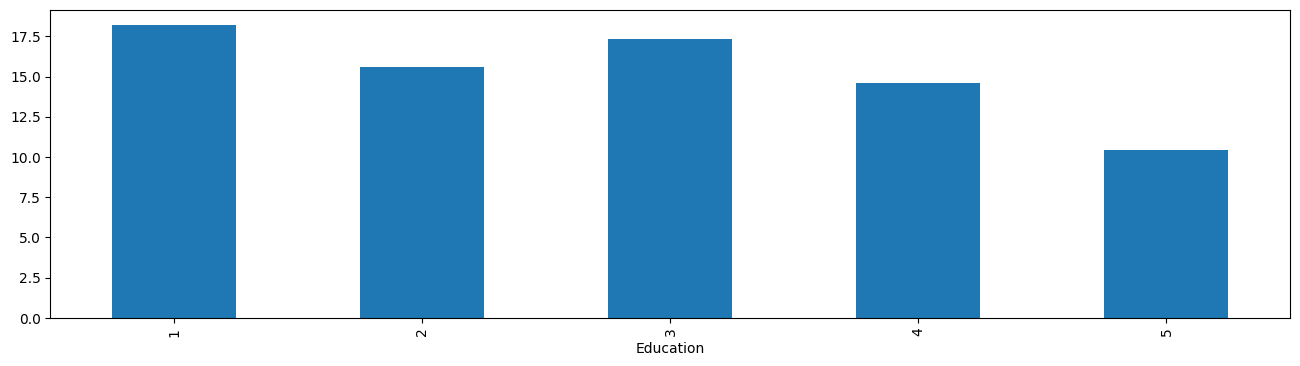

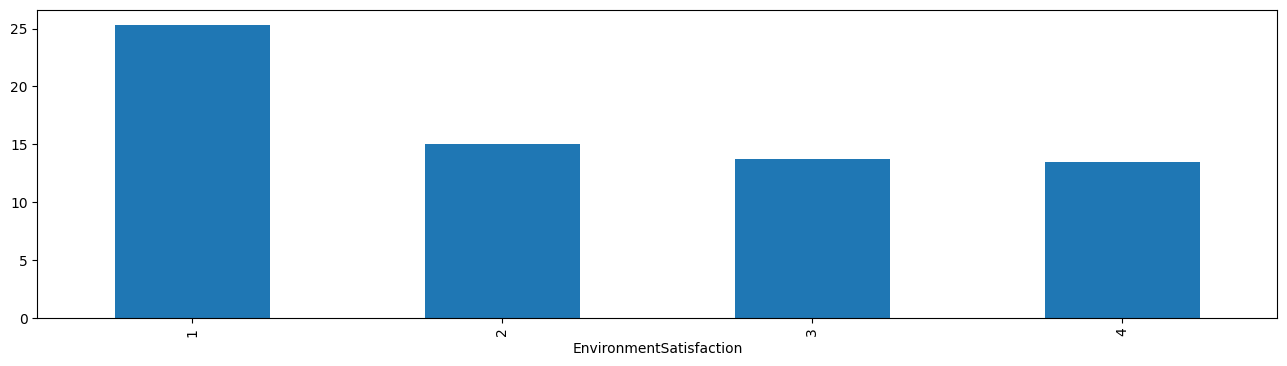

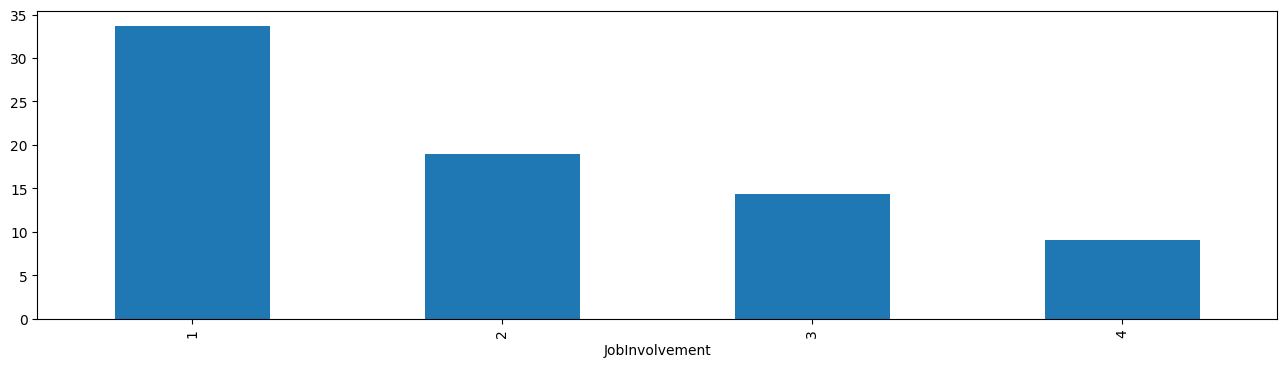

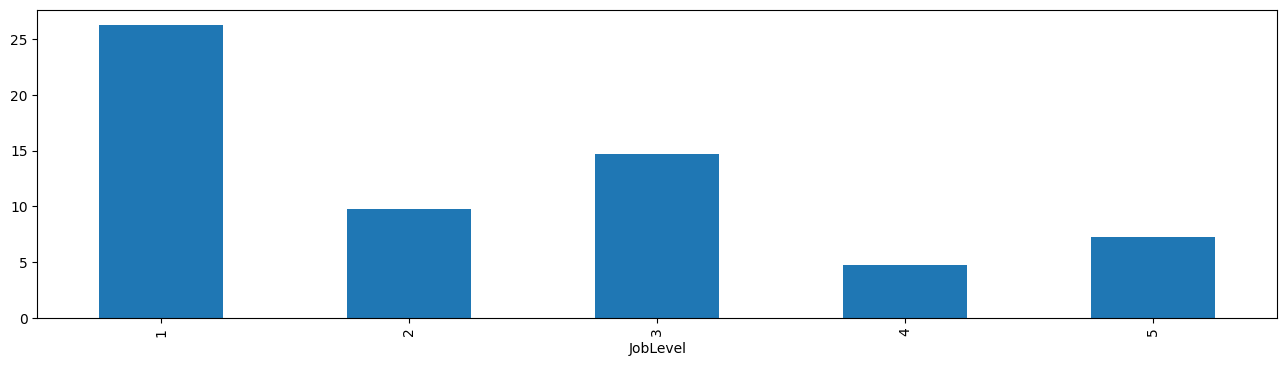

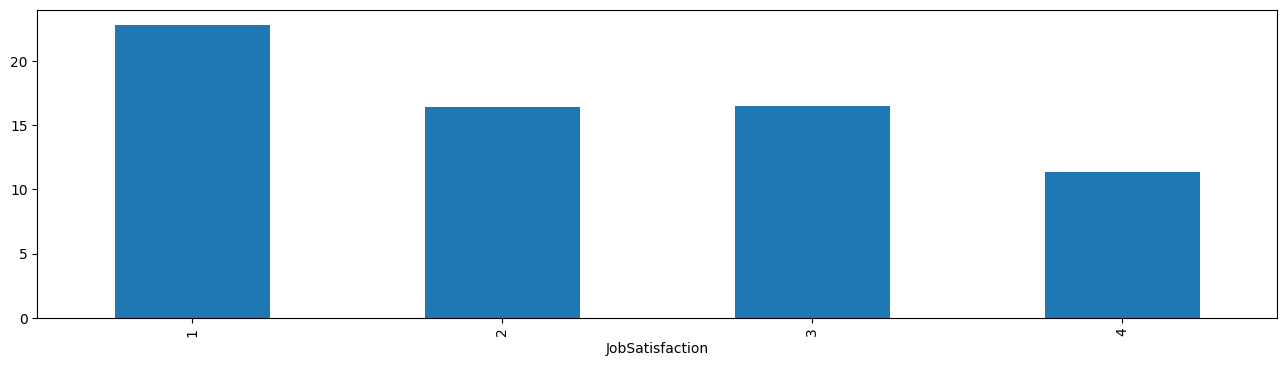

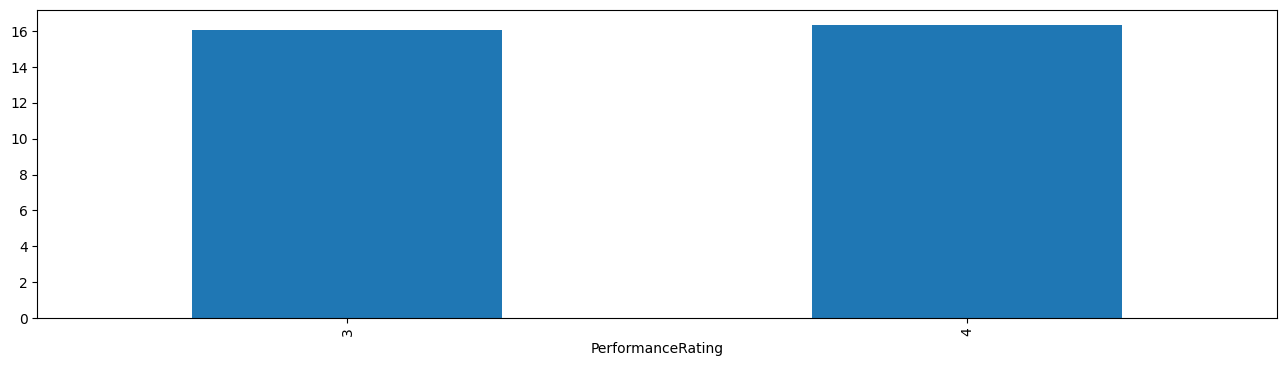

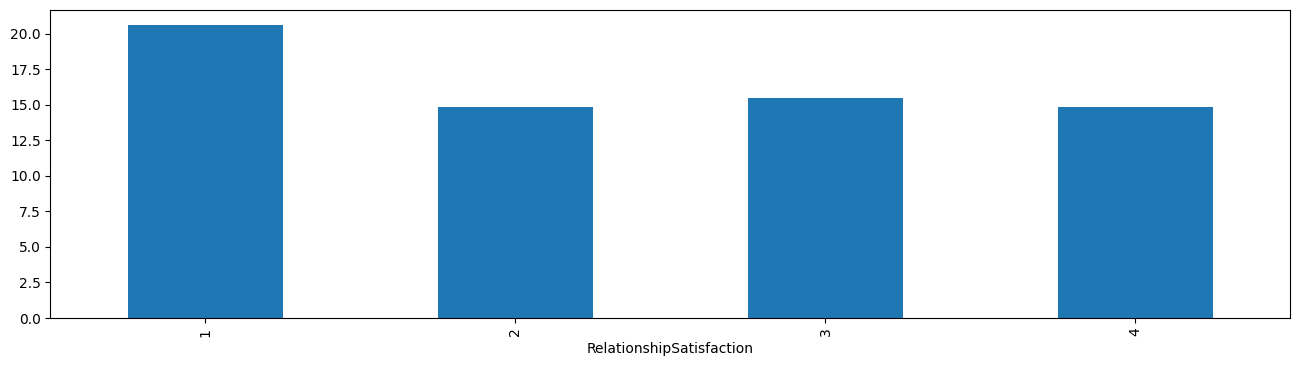

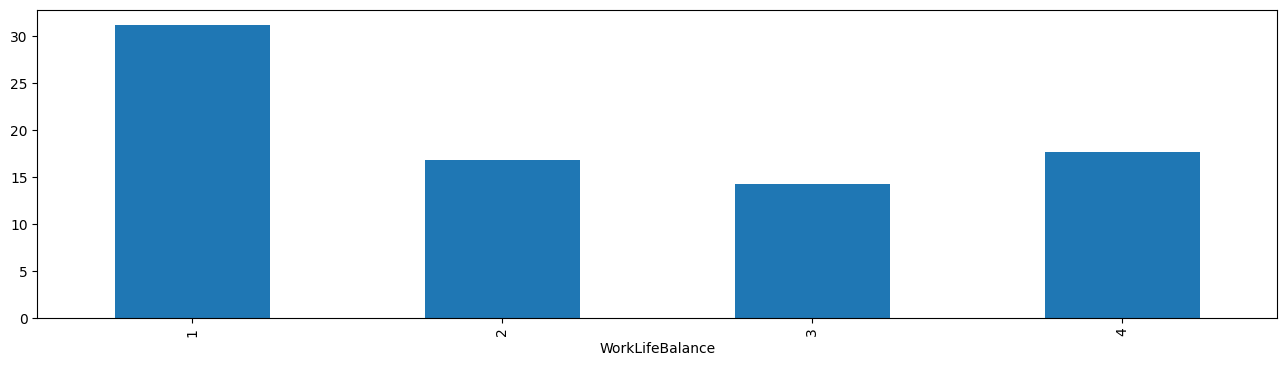

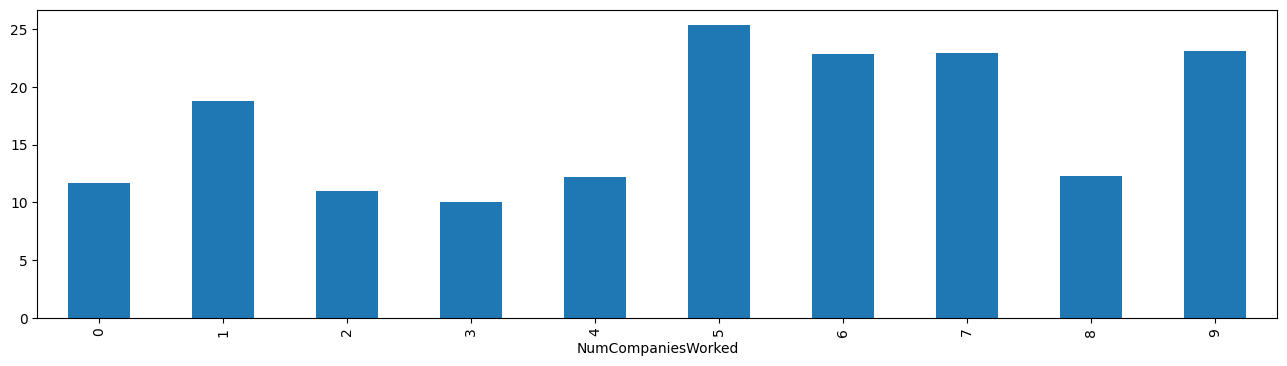

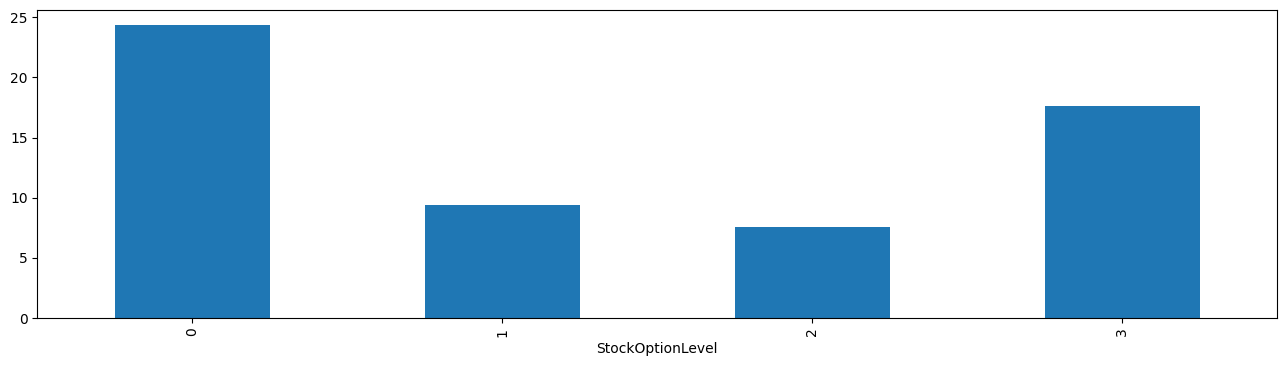

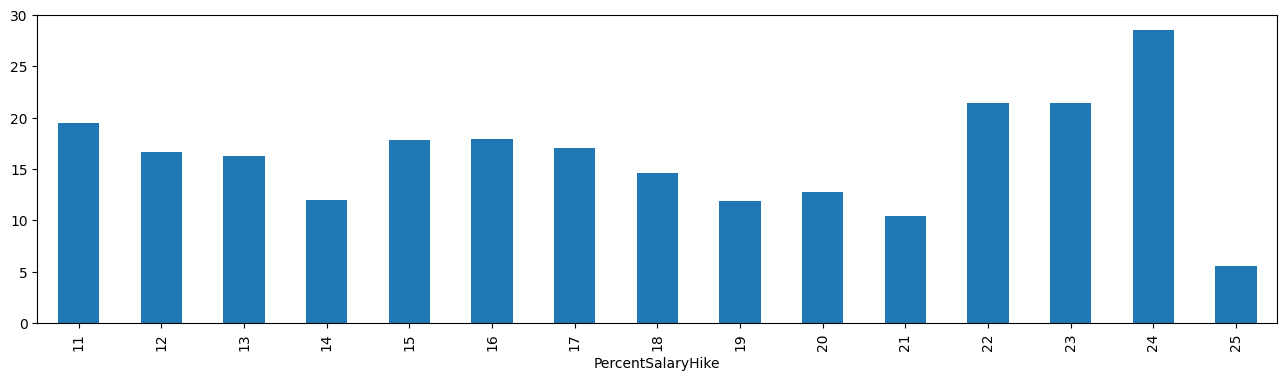

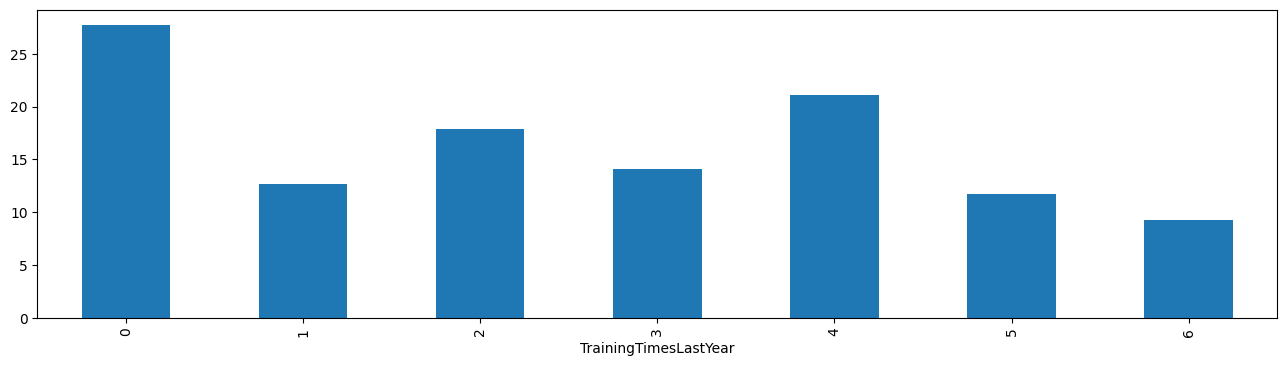

In [25]:
for i in cat_vars:
    plot_cat_percent(i, df)

These columns are not thatmuch contributing to the attrition rate

**`Gender, Over18, PerformanceRating`**

In those features ratio of employees leaving are almost the same, So we can drop those columns

## Numerical Variables

In [26]:
num_vars = [var for var in df.columns if var not in cat_vars and var!=target]

In [27]:
num_vars

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

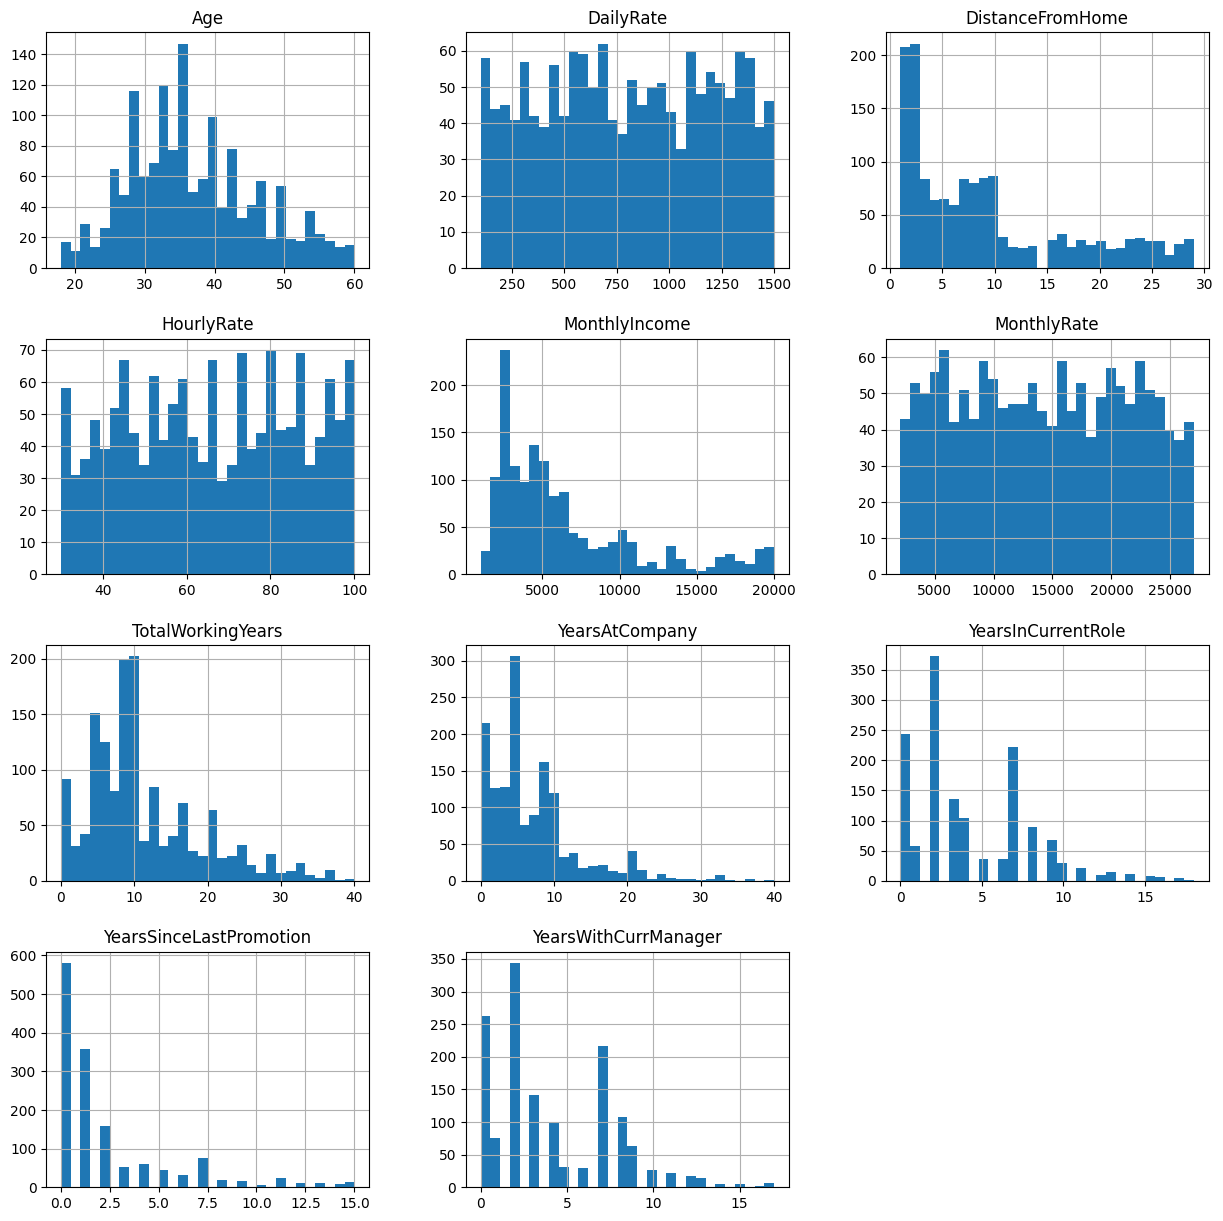

In [28]:
df[num_vars].hist(bins=30, figsize=(15,15))
plt.show()

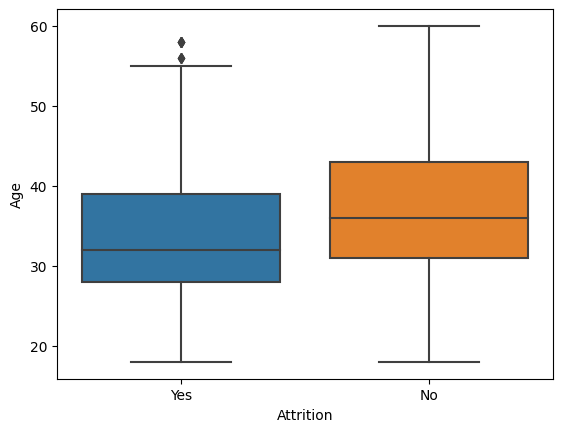

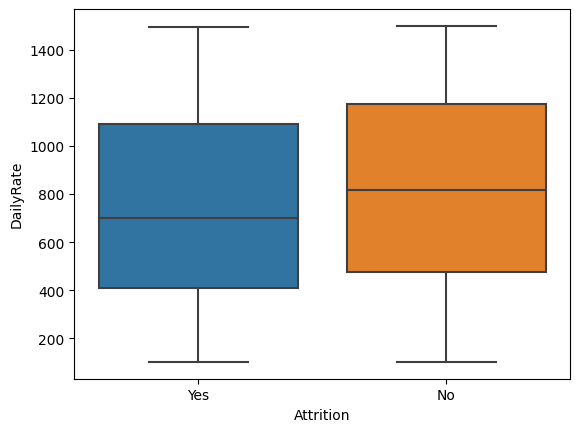

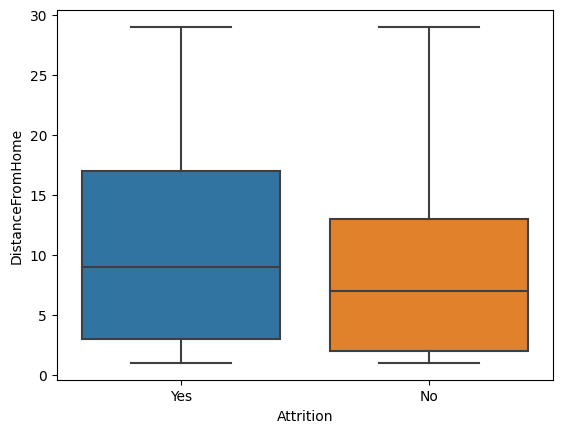

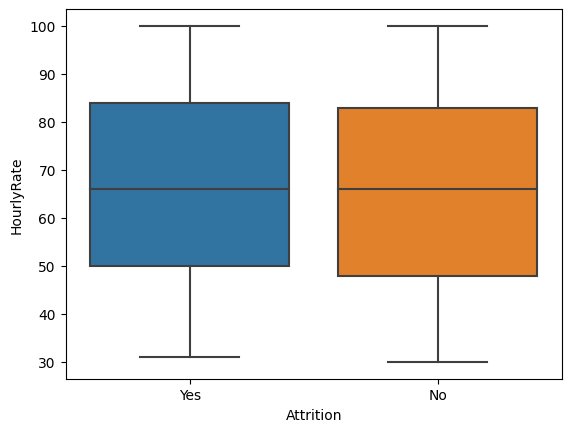

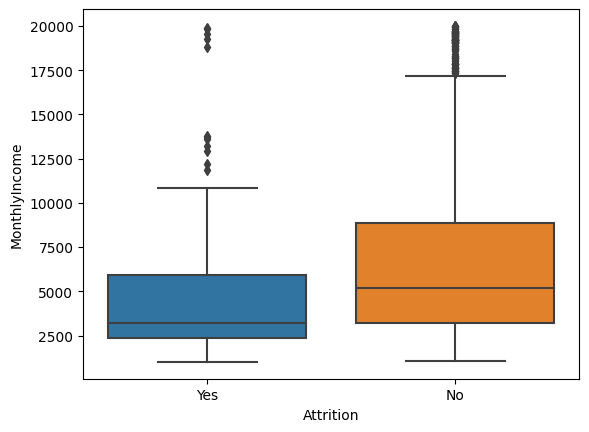

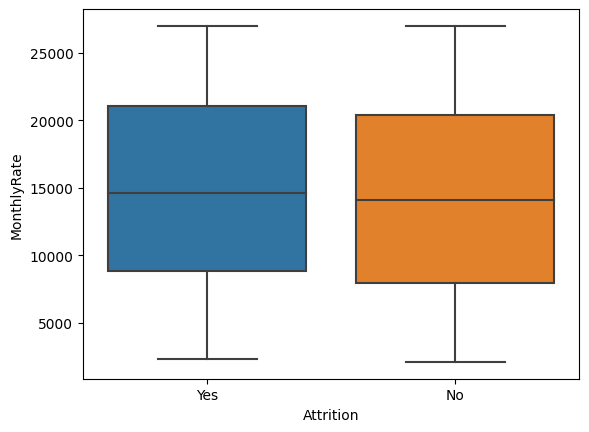

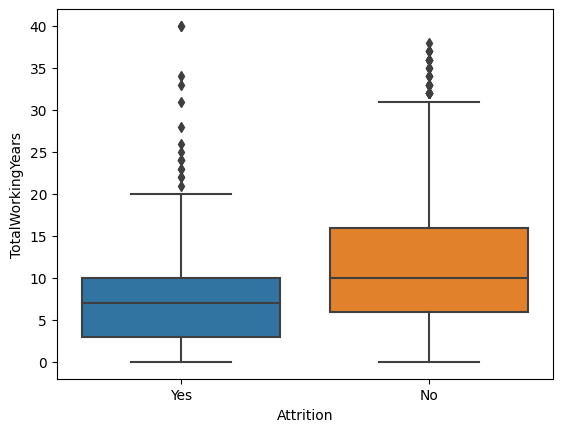

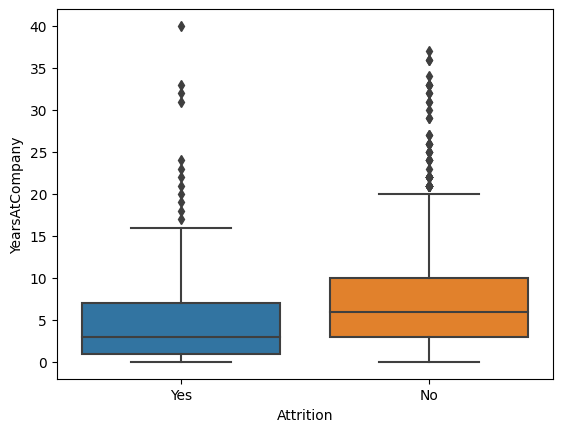

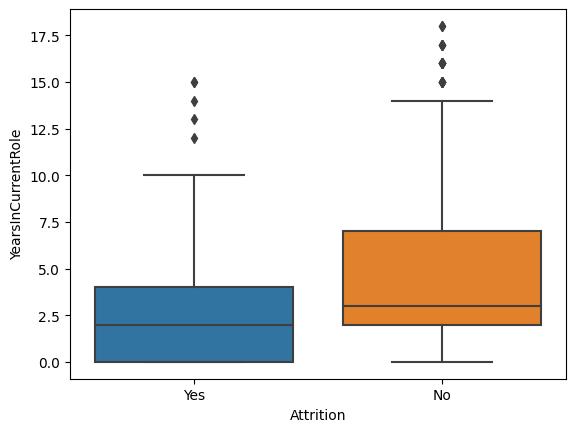

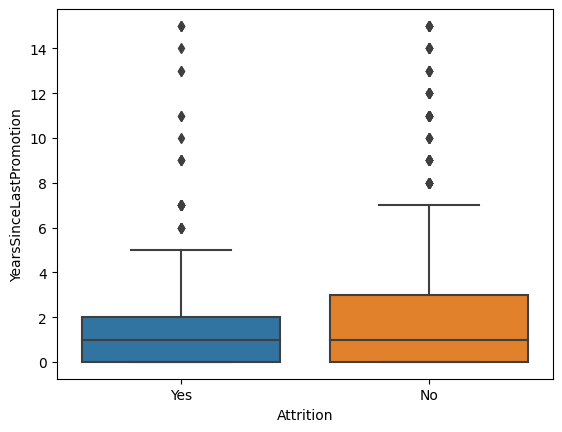

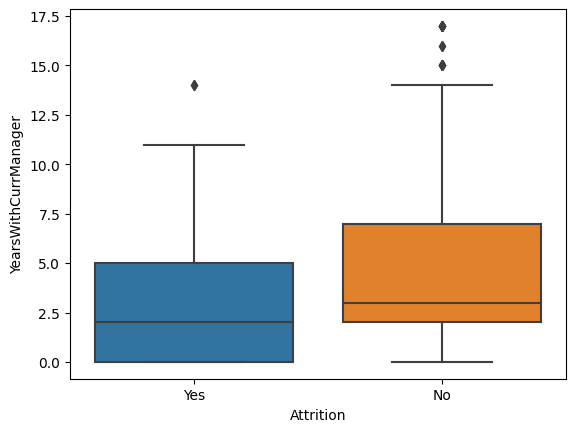

In [29]:
for i in num_vars:
    sns.boxplot(x=target, y=i, data=df)
    plt.show()


In [30]:
df[num_vars + [target]].groupby(target).describe()

Age                                                   DailyRate  \
            count       mean      std   min   25%   50%   75%   max     count   
Attrition                                                                       
No         1233.0  37.561233  8.88836  18.0  31.0  36.0  43.0  60.0    1233.0   
Yes         237.0  33.607595  9.68935  18.0  28.0  32.0  39.0  58.0     237.0   

                                                                        \
                 mean         std    min    25%    50%     75%     max   
Attrition                                                                
No         812.504461  403.208379  102.0  477.0  817.0  1176.0  1499.0   
Yes        750.362869  401.899519  103.0  408.0  699.0  1092.0  1496.0   

          DistanceFromHome                                                  \
                     count       mean       std  min  25%  50%   75%   max   
Attrition                                                                    
No                  1233.0   8.915653  8.012633  1.0  2.0  7.0  13.0  29.0   
Yes                  237.0  10.632911  8.452525  1.0  3.0  9.0  17.0  29.0   

          HourlyRate                                                       \
               count       mean        std   min   25%   50%   75%    max   
Attrition                                                                   
No            1233.0  65.952149  20.380754  30.0  48.0  66.0  83.0  100.0   
Yes            237.0  65.573840  20.099958  31.0  50.0  66.0  84.0  100.0   

          MonthlyIncome                                                    \
                  count         mean          std     min     25%     50%   
Attrition                                                                   
No               1233.0  6832.739659  4818.208001  1051.0  3211.0  5204.0   
Yes               237.0  4787.092827  3640.210367  1009.0  2373.0  3202.0   

                           MonthlyRate                                     \
              75%      max       count          mean          std     min   
Attrition                                                                   
No         8834.0  19999.0      1233.0  14265.779400  7102.260749  2094.0   
Yes        5916.0  19859.0       237.0  14559.308017  7208.153264  2326.0   

                                             TotalWorkingYears             \
              25%      50%      75%      max             count       mean   
Attrition                                                                   
No         7973.0  14120.0  20364.0  26997.0            1233.0  11.862936   
Yes        8870.0  14618.0  21081.0  26999.0             237.0   8.244726   

                                                YearsAtCompany            \
                std  min  25%   50%   75%   max          count      mean   
Attrition                                                                  
No         7.760719  0.0  6.0  10.0  16.0  38.0         1233.0  7.369019   
Yes        7.169204  0.0  3.0   7.0  10.0  40.0          237.0  5.130802   

                                               YearsInCurrentRole            \
                std  min  25%  50%   75%   max              count      mean   
Attrition                                                                     
No         6.096298  0.0  3.0  6.0  10.0  37.0             1233.0  4.484185   
Yes        5.949984  0.0  1.0  3.0   7.0  40.0              237.0  2.902954   

                                              YearsSinceLastPromotion  \
                std  min  25%  50%  75%   max                   count   
Attrition                                                               
No         3.649402  0.0  2.0  3.0  7.0  18.0                  1233.0   
Yes        3.174827  0.0  0.0  2.0  4.0  15.0                   237.0   

                                                        YearsWithCurrManager  \
               mean       std  min  25%  50%  75%   max                count   

**HourlyRate**, **MonthlyRate**, **YearsSinceLastPromotion** are not significant features here  

In [31]:
num_vars.remove('HourlyRate')
num_vars.remove('MonthlyRate')
num_vars.remove('YearsSinceLastPromotion')

<AxesSubplot: >

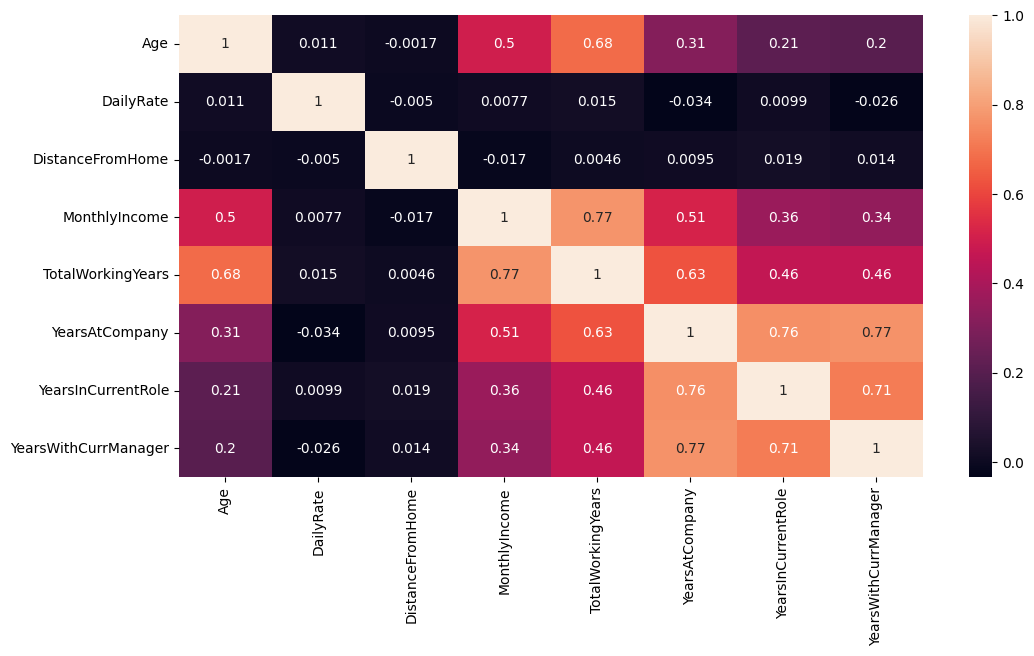

In [32]:
plt.figure(figsize=(12,6))
sns.heatmap(df[num_vars].corr(), annot=True)

From the heatmap it can be observed that there are some mutually correlated features

<AxesSubplot: xlabel='TotalWorkingYears', ylabel='MonthlyIncome'>

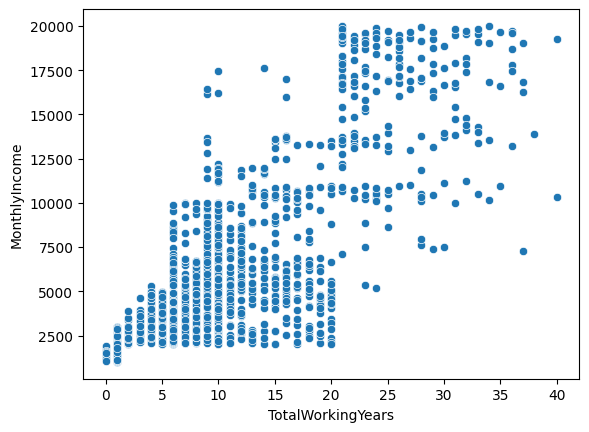

In [33]:
sns.scatterplot(x=df['TotalWorkingYears'], y=df['MonthlyIncome'])

Its predictable, since more the experience more the salary

<AxesSubplot: xlabel='Age', ylabel='TotalWorkingYears'>

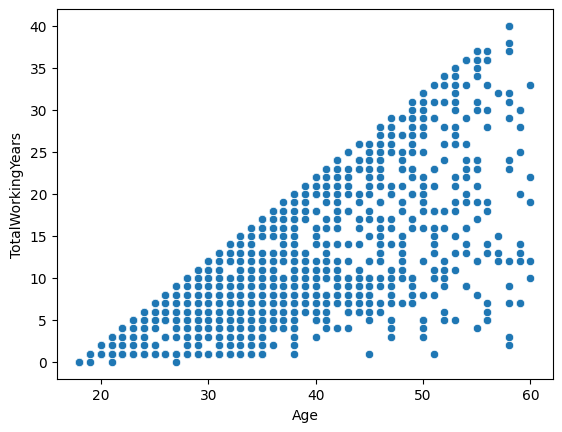

In [34]:
sns.scatterplot(y=df['TotalWorkingYears'], x=df['Age'])

Same inference as above

<AxesSubplot: xlabel='YearsAtCompany', ylabel='TotalWorkingYears'>

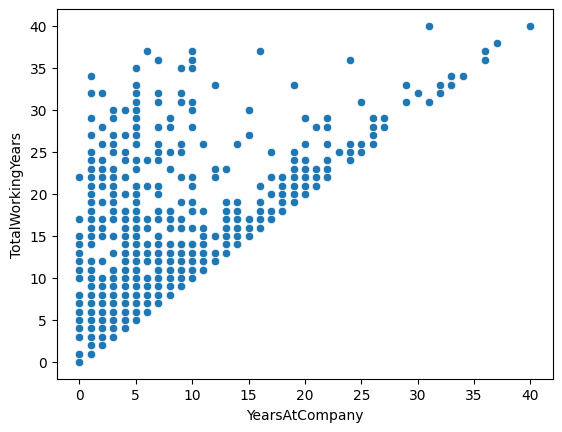

In [35]:
sns.scatterplot(x=df['YearsAtCompany'], y=df['TotalWorkingYears'])

<AxesSubplot: xlabel='TotalWorkingYears', ylabel='YearsInCurrentRole'>

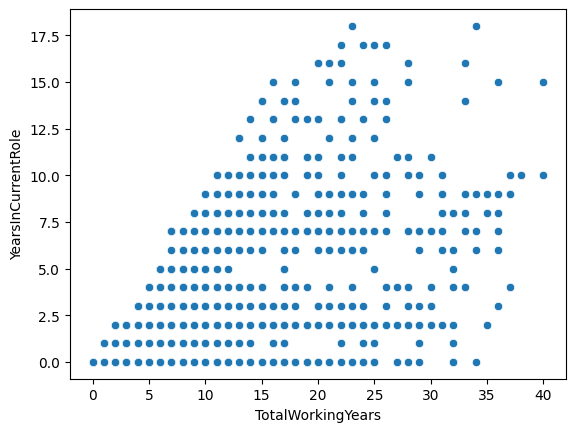

In [36]:
sns.scatterplot(y=df['YearsInCurrentRole'], x=df['TotalWorkingYears'])

<AxesSubplot: xlabel='TotalWorkingYears', ylabel='YearsWithCurrManager'>

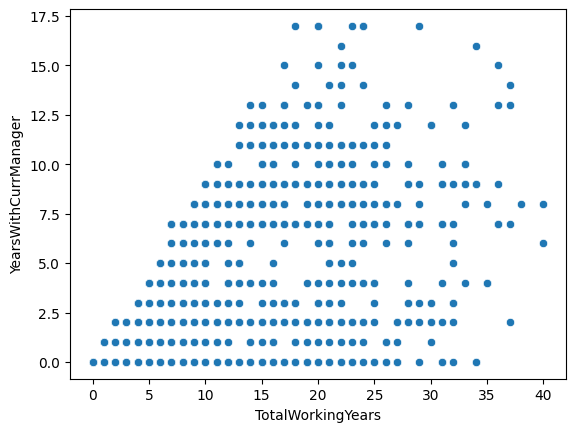

In [37]:
sns.scatterplot(y=df['YearsWithCurrManager'], x=df['TotalWorkingYears'])

We can remove `age` from the features set, because age is correlated with working years.


In [38]:
num_vars.remove('Age')

In [39]:
cat_vars.remove('Gender')
cat_vars.remove('Over18')
cat_vars.remove('PerformanceRating')

In [40]:
num_vars

['DailyRate',
 'DistanceFromHome',
 'MonthlyIncome',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

In [41]:
# selected features
fqs = num_vars + cat_vars + [target]

In [42]:
print(len(fqs), len(df.columns))

25 32


In [43]:
df = df[fqs]

Now we will encode various categories

We will encode **OverTime**, **Attrition** with OrdinalEncoder, and remaining with One Hot Encoder

In [44]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [45]:
enc = OrdinalEncoder()
oc_data = enc.fit_transform(df[['OverTime','Attrition']].values)

In [46]:
# DRop those mentioned columns and replace them with oc_data
ord_cols = ['OverTime','Attrition']
oc_df = pd.DataFrame(oc_data, columns=ord_cols)
df = df.drop(columns=ord_cols)
df = pd.concat([df, oc_df], axis=1)

In [47]:
ohc = OneHotEncoder(sparse=False, drop='first')

ohc_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
ohc_data = ohc.fit_transform(df[ohc_cols].values)

ohc_df = pd.DataFrame(ohc_data, columns=ohc.get_feature_names())
df = df.drop(columns=ohc_cols, axis=1)
df = pd.concat([df, ohc_df], axis=1)

/home/danielpepuho/Desktop/Github/KecerdasanBuatan/ann-clasification/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [48]:
df.dtypes

DailyRate                      int64
DistanceFromHome               int64
MonthlyIncome                  int64
TotalWorkingYears              int64
YearsAtCompany                 int64
YearsInCurrentRole             int64
YearsWithCurrManager           int64
Education                      int64
EnvironmentSatisfaction        int64
JobInvolvement                 int64
JobLevel                       int64
JobSatisfaction                int64
RelationshipSatisfaction       int64
WorkLifeBalance                int64
NumCompaniesWorked             int64
StockOptionLevel               int64
PercentSalaryHike              int64
TrainingTimesLastYear          int64
OverTime                     float64
Attrition                    float64
x0_Travel_Frequently         float64
x0_Travel_Rarely             float64
x1_Research & Development    float64
x1_Sales                     float64
x2_Life Sciences             float64
x2_Marketing                 float64
x2_Medical                   float64
x

In [49]:
df.head()

,DailyRate,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,NumCompaniesWorked,StockOptionLevel,PercentSalaryHike,TrainingTimesLastYear,OverTime,Attrition,x0_Travel_Frequently,x0_Travel_Rarely,x1_Research & Development,x1_Sales,x2_Life Sciences,x2_Marketing,x2_Medical,x2_Other,x2_Technical Degree,x3_Human Resources,x3_Laboratory Technician,x3_Manager,x3_Manufacturing Director,x3_Research Director,x3_Research Scientist,x3_Sales Executive,x3_Sales Representative,x4_Married,x4_Single
0,1102,1,5993,8,6,4,5,2,2,3,2,4,1,1,8,0,11,0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,279,8,5130,10,10,7,7,1,3,2,2,2,4,3,1,1,23,3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1373,2,2090,7,0,0,0,2,4,2,1,3,2,3,6,0,15,3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1392,3,2909,8,8,7,0,4,4,3,1,3,3,3,1,0,11,3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,591,2,3468,6,2,2,2,1,1,3,1,2,4,3,9,1,12,3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [50]:
X = df.drop('Attrition', axis=1)
y = df['Attrition'].values

In [51]:
y.shape

(1470,)

Now it's time to use SMOTE method to balance the output classes, This is a simple implementation you can finetune this later

In [54]:
#from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
Xo, yo = oversample.fit_resample(X, y)

In [ ]:
yo.shape

(2466,)

<AxesSubplot:ylabel='count'>

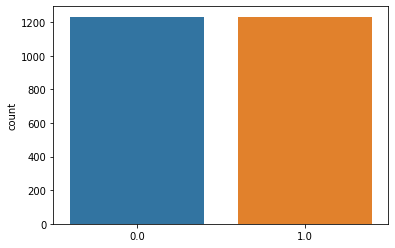

In [ ]:
sns.countplot(x=yo)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xo, yo, test_size=0.2, random_state=41)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [ ]:
print(X_train_sc.shape, X_test_sc.shape)

(1972, 38) (494, 38)


## First Model

## Simple ann model

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(38, input_shape=(38,), activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

2022-11-16 20:42:59.662470: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-16 20:43:00.318414: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-16 20:43:00.318481: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-16 20:43:00.399769: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-16 20:43:02.703131: W tensorflow/stream_executor/platform/de

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                1482      
                                                                 
 dense_1 (Dense)             (None, 19)                741       
                                                                 
 dense_2 (Dense)             (None, 9)                 180       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 2,413
Trainable params: 2,413
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=X_train_sc, y=y_train, epochs=50, validation_data=(X_test_sc, y_test))

Epoch 1/50
62/62 [==============================] - 1s 12ms/step - loss: 0.6710 - accuracy: 0.5988 - val_loss: 0.5888 - val_accuracy: 0.8016
Epoch 2/50
62/62 [==============================] - 0s 3ms/step - loss: 0.5329 - accuracy: 0.8020 - val_loss: 0.4354 - val_accuracy: 0.8097
Epoch 3/50
62/62 [==============================] - 0s 3ms/step - loss: 0.3953 - accuracy: 0.8444 - val_loss: 0.3754 - val_accuracy: 0.8421
Epoch 4/50
62/62 [==============================] - 0s 3ms/step - loss: 0.3335 - accuracy: 0.8685 - val_loss: 0.3704 - val_accuracy: 0.8441
Epoch 5/50
62/62 [==============================] - 0s 3ms/step - loss: 0.3097 - accuracy: 0.8791 - val_loss: 0.3475 - val_accuracy: 0.8421
Epoch 6/50
62/62 [==============================] - 0s 3ms/step - loss: 0.3015 - accuracy: 0.8724 - val_loss: 0.3394 - val_accuracy: 0.8421
Epoch 7/50
62/62 [==============================] - 0s 3ms/step - loss: 0.3095 - accuracy: 0.8685 - val_loss: 0.3334 - val_accuracy: 0.8543
Epoch 8/50
62/62 [=

<AxesSubplot:>

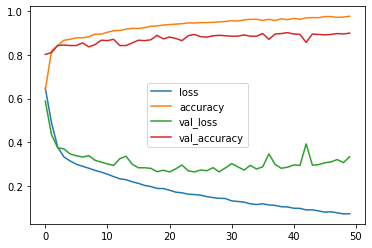

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
pred = model.predict(X_test_sc)
pred = np.where(pred>0.5, 1, 0)
from sklearn.metrics import confusion_matrix, classification_report
c_m = confusion_matrix(y_test, pred)
print(c_m)
print(classification_report(y_test, pred))

[[204  32]
 [ 18 240]]
              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89       236
         1.0       0.88      0.93      0.91       258

    accuracy                           0.90       494
   macro avg       0.90      0.90      0.90       494
weighted avg       0.90      0.90      0.90       494



## Model 2

## For this model, we are adding an earlystopping (it's not required, I am doing it for learning purpose)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [ ]:
model_e = Sequential()

model_e.add(Dense(38, input_shape=(38,), activation='relu'))
model_e.add(Dense(19, activation='relu'))
model_e.add(Dense(9, activation='relu'))
model_e.add(Dense(1, activation='sigmoid'))

model_e.summary()

model_e.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 38)                1482      
_________________________________________________________________
dense_5 (Dense)              (None, 19)                741       
_________________________________________________________________
dense_6 (Dense)              (None, 9)                 180       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 10        
Total params: 2,413
Trainable params: 2,413
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_e.fit(x=X_train_sc, y=y_train, 
          epochs=50, validation_data=(X_test_sc, y_test), callbacks=[early_stop])

Epoch 1/50
62/62 [==============================] - 1s 5ms/step - loss: 0.6538 - accuracy: 0.5943 - val_loss: 0.5353 - val_accuracy: 0.7652
Epoch 2/50
62/62 [==============================] - 0s 3ms/step - loss: 0.4818 - accuracy: 0.7885 - val_loss: 0.4170 - val_accuracy: 0.8279
Epoch 3/50
62/62 [==============================] - 0s 3ms/step - loss: 0.3638 - accuracy: 0.8551 - val_loss: 0.4066 - val_accuracy: 0.8138
Epoch 4/50
62/62 [==============================] - 0s 3ms/step - loss: 0.3367 - accuracy: 0.8622 - val_loss: 0.3647 - val_accuracy: 0.8462
Epoch 5/50
62/62 [==============================] - 0s 3ms/step - loss: 0.3095 - accuracy: 0.8666 - val_loss: 0.3449 - val_accuracy: 0.8522
Epoch 6/50
62/62 [==============================] - 0s 3ms/step - loss: 0.3013 - accuracy: 0.8801 - val_loss: 0.3545 - val_accuracy: 0.8340
Epoch 7/50
62/62 [==============================] - 0s 3ms/step - loss: 0.2842 - accuracy: 0.8748 - val_loss: 0.3295 - val_accuracy: 0.8421
Epoch 8/50
62/62 [==

<AxesSubplot:>

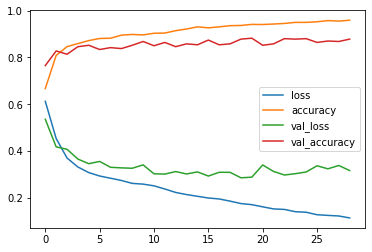

In [ ]:
model_loss = pd.DataFrame(model_e.history.history)
model_loss.plot()

In [ ]:
pred = model_e.predict(X_test_sc)
pred = np.where(pred>0.5, 1, 0)
from sklearn.metrics import confusion_matrix, classification_report
c_m = confusion_matrix(y_test, pred)
print(c_m)
print(classification_report(y_test, pred))

[[201  35]
 [ 25 233]]
              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87       236
         1.0       0.87      0.90      0.89       258

    accuracy                           0.88       494
   macro avg       0.88      0.88      0.88       494
weighted avg       0.88      0.88      0.88       494



### That's it from my end, This notebook was a part of deep learning journey

### PLzzzzzzz like / star if it's good